## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [140]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [142]:
df.head(10)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [10]:
#2 Check the shape of the DataFrame (rows, columns)
print(df.shape[0])
print(df.shape[1])

545
13


In [76]:
df.shape

(545, 13)

In [144]:
#3 Look at the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [74]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [146]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()

#df.fillna(df.mean(), inplace=True)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [148]:
#5 Prepare  X (independent variables) and y (dependent variable)
x=df.drop('price',axis=1)
y=df['price']



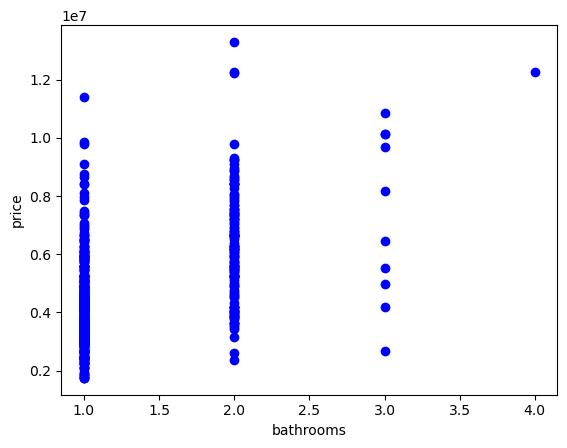

In [28]:
plt.scatter(df["bathrooms"],df["price"],color="blue")
plt.xlabel("bathrooms")
plt.ylabel("price")
plt.show()

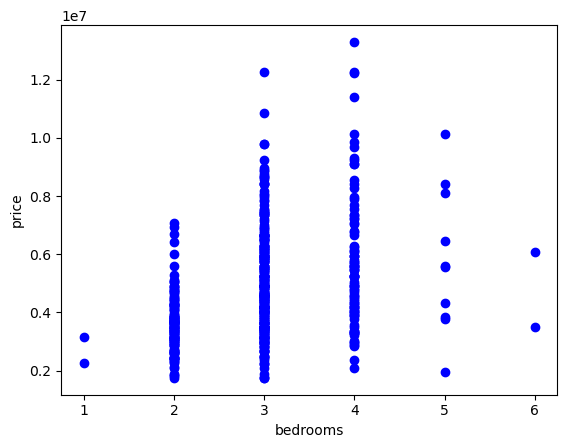

In [30]:
plt.scatter(df["bedrooms"],df["price"],color="blue")
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()

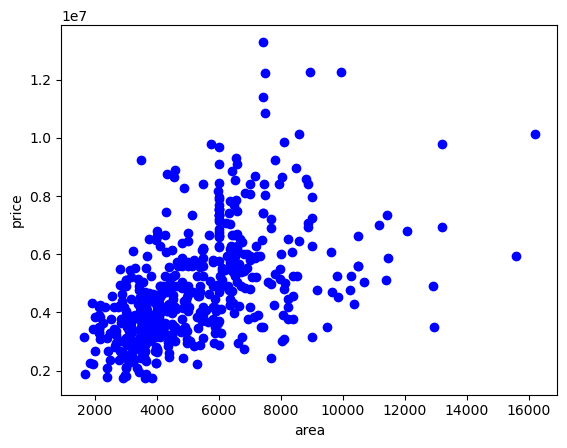

In [82]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots\import matplotlib.pyplot as plt
plt.scatter(df["area"],df["price"],color="blue")
plt.xlabel("area")
plt.ylabel("price")
plt.show()

In [168]:
#7 Encoding categorical data in X
x=pd.get_dummies(x,drop_first=True)
x


,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [170]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [154]:
#8  Avoiding the Dummy Variable Trap
#df=df.drop_duplicates()
pd.get_dummies(df['furnishingstatus'])


,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
540,False,False,True
541,False,True,False
542,False,False,True
543,True,False,False


In [158]:
from sklearn.preprocessing import LabelEncoder,OnehotEncoder
le=LabelEncoder()
ohe=OnehotEncoder()
#le.fit_transform(df['furnishingstatus'])


array([0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1,
       0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1,
       2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1,
       1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1,

In [174]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_scaled=scaler.fit_transform(x)


x_scaled


array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.80494113,
        -0.84488844, -0.6964292 ],
       [ 1.75700953,  1.40341936,  5.40580863, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.80494113,
         1.18358821, -0.6964292 ],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615]])

In [178]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)



In [180]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [182]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [184]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_train_pred = model.predict(X_train)
errors = y_train_pred - y_train

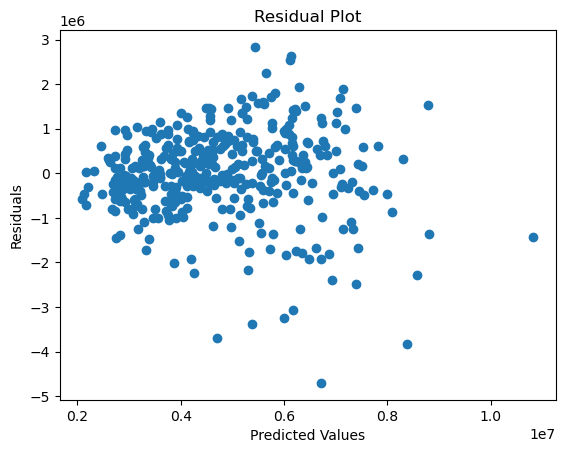

In [186]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
plt.scatter(y_train_pred, errors)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
#14  Predic on the test set

In [ ]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

In [ ]:
#16 Print Mean Squared Error and R Squared Value

In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)